<a href="https://colab.research.google.com/github/KIV21052/Curve-ETH-stETH-PL/blob/main/Validators_profitability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import datetime as dt
#pd.options.display.float_format = '{:,.4f}'.format

In [ ]:
n0 = {'n':0, 'name':'staking_facilities', 'address':'0xdd4bc51496dc93a0c47008e820e0d80745476f22','totalkeys':2000, 'activekeys':2000}
n1 = {'n':1, 'name':'certus_one', 'address':'0x8d689476eb446a1fb0065bffac32398ed7f89165','totalkeys':1000, 'activekeys':1000}
n2 = {'n':2, 'name':'p2p_validator', 'address':'0x9a66fd7948a6834176fbb1c4127c61cb6d349561','totalkeys':3000, 'activekeys':2522}
n3 = {'n':3, 'name':'chorus_one', 'address':'0x0ac7e9af32422ac5968622585822e4d89ef51343','totalkeys':2400, 'activekeys':2400}
n4 = {'n':4, 'name':'stakefish', 'address':'0x987cc5111389a1f58bc7f678c95f485631205ec3','totalkeys':2048, 'activekeys':2048}
n5 = {'n':5, 'name':'blockscape', 'address':'0x5f74a2db08d717c94457c550af54548c4241ace9','totalkeys':1000, 'activekeys':400}
n6 = {'n':6, 'name':'dsrv', 'address':'0xc0b581e041c17716ea1fcede4ec40e2e27a48aba','totalkeys':100, 'activekeys':100}
n7 = {'n':7, 'name':'everstake', 'address':'0x3d5a107f7a5bcec8734c49ed54d41bc6f93eb97f','totalkeys':320, 'activekeys':100}
n8 = {'n':8, 'name':'skillz', 'address':'0xe080e860741b7f9e8369b61645e68ad197b1e74c','totalkeys':500, 'activekeys':100}
list_val = [n0,n1,n2,n3,n4,n5,n6,n7,n8]
stakefish_keys = [10, 246, 128, 128, 64, 448, 276, 748]
chorus_one_keys = [100, 100, 300, 500, 600, 800]
timeline = pd.DataFrame(pd.date_range(start="2020-12-19",end="2021-05-16"), columns = ['day'])
steth_price = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.991453666161353, 0.9868332702632949, 0.9914256423083093, 0.9931066916492098, 0.998412027927565, 0.998723352386798, 0.997283905887669, 0.9990682488549416, 1.0028077274998148, 1.0046390622328267, 1.0009905614500207, 0.9977149733584688, 0.9797515932135261, 0.9777885716299226, 0.9955400950120148, 1.002624990521635, 0.9993867807236798, 0.996614120892219, 1.0011061173320601, 0.9851551587617533, 0.9921577350970995, 1.002004443994114, 1.000534021897907, 1.0000386625941777, 0.9906612019693659, 0.9903811764634434, 0.9869753822355967, 0.9986163320217492, 1.0010774024583027, 0.9999260344218643, 0.9989484560961851, 1.000427285021639, 1.000630409329237, 1.002428336494936, 1.000179688066287, 0.9989122173718347, 0.9886431603602283, 0.9931880734335696, 0.9947745765489558, 0.9990970083519704, 0.9983809023699067, 0.9975313248864257, 0.9955005924624863, 0.9968874921598907, 0.9991972599439661, 0.9963809976709659, 0.993626849226543, 0.9921069163586648, 0.9886633669863182, 0.9900679458471182, 0.9897337855570686, 0.987831806259718, 0.9887987287884975, 0.977812099156509, 0.9784906842520558, 0.9782098045684855, 0.9777088193791454, 0.974266960467347, 0.9685681843151417, 0.9646213761066801, 0.965241029100439, 0.9598307600133492, 0.9696032534918637, 0.9729857980909022, 0.9725168724232391, 0.9693605380995349, 0.9746493062482623, 0.9769550771296801, 0.9751873854007554, 0.9765212323182274, 0.9763586041522107, 0.9744046407720744, 0.9735249325651302, 0.9732836291358645, 0.9746899880566474, 0.9765799155607316, 0.9667382803564819, 0.9639032611438708, 0.9576404197263007, 0.9641105077526528, 0.9669874609037897, 0.9710173323167559, 0.9702571419166658, 0.9761097714347894, 0.9807928514291416, 0.9819795063150172, 0.9851007501133803, 0.9836072399256245, 0.9866699423355824, 0.9891568749773755, 1.0011043458841806, 0.9962958671165487, 0.9949402069359623, 0.9901153938565638, 0.9935168123967901, 1.0063375596361077, 0.9947562547525226, 1.0069461771051555, 1.001668377786442, 0.9965406848769295, 0.9925749605200013, 0.9903621764034601, 0.9898631751811493, 0.9906633853867289, 0.9909416810117344, 0.9897427343997646, 0.9907333496194274, 0.9933836358622391, 0.9892474932406715, 0.989316926010589, 0.9903656840648858, 0.9902986688246765, 0.9890091725605258, 0.9884397518919632, 0.9908864603613331, 0.995661628677151, 0.9979138927344281, 0.997250175147272, 0.9963843541466011, 0.9962706010451213, 0.9996857871693146, 1.0002104252670203, 1.0046863829574963, 1.0002271057729792, 0.9993365387313542, 0.9997388475484245, 0.997650421338297, 0.9992096647516998, 0.998052906594824, 0.999852907020767, 1.0004541837706675, 0.9994609082463507
]


In [ ]:
# fees for key creating
adr_fee = '0x55032650b14df07b85bf18a3a3ec8e0af2e028d5'
file_name_1 = 'C:/temp/export-' + adr_fee + '_withnotes.csv'
df_trans = pd.read_csv(file_name_1) 
df_trans_failed = df_trans[df_trans['Status']=='Error(0)']    
df_trans = df_trans[df_trans['Status']!='Error(0)']
df_trans = df_trans[df_trans['To']=='0x55032650b14df07b85bf18a3a3ec8e0af2e028d5']
df_trans =df_trans[['Txhash','UnixTimestamp','DateTime','From','TxnFee(ETH)','Historical $Price/Eth']]
df_trans.columns = ['txhash', 'unixtimestamp', 'datetime', 'from_adr','fee_eth', 'eth_price']
df_trans['day'] = pd.to_datetime(df_trans['datetime'], format='%Y-%m-%dT%H:%M:%S').dt.floor('D')

C:\Users\neos\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [ ]:
# preparing fee dataset
for n in list_val:
    
    adr = n['address']
    fee = df_trans.query('from_adr == @adr').pivot_table(index = 'day', values = 'fee_eth', aggfunc = ['sum','count'])
    fee.columns = ['fee', 'cnt_fee']
    
    if n['name'] == 'stakefish': fee['addedkeys'] = stakefish_keys
    elif n['name'] == 'chorus_one': fee['addedkeys'] = chorus_one_keys
    else: fee['addedkeys']=fee.cnt_fee*20
    
    fee['keyprice'] = fee.fee/fee.addedkeys
    
    fee = pd.merge(timeline, fee, left_on = 'day',right_on=fee.index, how='left').set_index('day')
    fee = fee.fillna(0)
    
    fee['totalkeys']=fee['addedkeys'].cumsum()
    
    fee['activekeys'] = fee['totalkeys'].where(fee['totalkeys']<= n['activekeys'],n['activekeys'])
    
    
    
    token = 'stETH'
    adr_reward = '0x0000000000000000000000000000000000000000'
    file_name_token = 'C:/temp/export-address-token-' + adr + '_withnotes.csv'
    df_token = pd.read_csv(file_name_token)
    df_token.columns = ['txhash', 'unixtimestamp','datetime','from_address','to_address','value','contractaddress','tokenname','tokensymbol','privatenote']
    try:
        df_token.value.cumsum()
    except:
        df_token['value'] = pd.to_numeric(df_token['value'].str.replace(',', ''))
    
    df_reward = df_token.query('tokenname == @token and to_address == @adr and from_address == @adr_reward' )[['txhash','unixtimestamp','datetime','value']]
    df_reward['day'] = pd.to_datetime(df_reward['datetime'], format='%Y-%m-%dT%H:%M:%S').dt.floor('D')
    try: 
        df_reward.pivot_table(index = 'day', values = 'value', aggfunc = ['sum','mean','count'])
    
    except:
        df_reward['value'] = pd.to_numeric(df_reward['value'].str.replace(',', ''))
    reward = df_reward.pivot_table(index = 'day', values = 'value', aggfunc = ['sum'])
    reward.columns = ['reward']
    
    reward = pd.merge(timeline, reward, left_on = 'day',right_on=reward.index, how='left').set_index('day')
    reward = reward.fillna(0)
    reward['reward_cumul'] = reward['reward'].cumsum()
    
    stat = pd.merge(fee, reward, left_on = fee.index,right_on=reward.index).set_index('key_0')
    



    
    n.update({'df_fee':df_trans.query('from_adr == @adr')})
    n.update({'fee':fee})
    n.update({'df_reward':df_reward})
    n.update({'reward':reward})
    n.update({'stat':stat})

In [ ]:
# Model 1 Calculating keys neened based on the amount of ETH staked

df_steth = pd.concat([pd.read_csv('C:/temp/export-token-0xae7ab96520de3a18e5e111b5eaab095312d7fe84_1.csv'), pd.read_csv('C:/temp/export-token-0xae7ab96520de3a18e5e111b5eaab095312d7fe84_2.csv')],ignore_index=True)
df_steth.columns = ['txhash', 'blockno', 'unixtimestamp', 'datetime', 'from_adr', 'to_adr', 'value']
df_steth['value'] = pd.to_numeric(df_steth['value'].str.replace(',', ''))
df_steth['day'] = pd.to_datetime(df_steth['datetime'], format='%Y-%m-%dT%H:%M:%S').dt.floor('D')
steth = df_steth.pivot_table(index = 'day', values = 'value', aggfunc = ['sum','count'])
steth.columns = ['steth_staked', 'cnt_trans']
steth['total_steth_staked'] = steth.steth_staked.cumsum()
steth['total_steth_staked_keys'] = round(steth.total_steth_staked/32)
steth

,steth_staked,cnt_trans,total_steth_staked,total_steth_staked_keys
day,,,,
2020-12-18,1.530000,4,1.530000,0.0
2020-12-19,2270.926883,174,2272.456883,71.0
2020-12-20,1889.014550,89,4161.471433,130.0
2020-12-21,1409.018649,32,5570.490082,174.0
2020-12-22,1957.976793,60,7528.466875,235.0
...,...,...,...,...
2021-05-12,723.013184,66,332826.615062,10401.0
2021-05-13,2894.868141,78,335721.483204,10491.0
2021-05-14,1716.141008,70,337437.624212,10545.0


In [ ]:
# Model 2 Calculating total keys activated by Lido

f_1 = pd.read_csv('C:/temp/export-0xae7ab96520de3a18e5e111b5eaab095312d7fe84_1.csv')
f_2 = pd.read_csv('C:/temp/export-0xae7ab96520de3a18e5e111b5eaab095312d7fe84_2.csv')
f_3 = pd.read_csv('C:/temp/export-0xae7ab96520de3a18e5e111b5eaab095312d7fe84_3.csv')
f_4 = pd.read_csv('C:/temp/export-0xae7ab96520de3a18e5e111b5eaab095312d7fe84_4.csv')
f_5 = pd.concat([pd.concat([pd.concat([f_1, f_2],ignore_index=True), f_3],ignore_index=True),f_4],ignore_index=True)
f_5['day'] = pd.to_datetime(f_5['DateTime'], format='%Y-%m-%dT%H:%M:%S').dt.floor('D')
adr_from = '0xae7ab96520de3a18e5e111b5eaab095312d7fe84'
adr_to = '0x00000000219ab540356cbb839cbe05303d7705fa'
status = 1
df_deposit = f_5.query('From == @adr_from and TxTo == @adr_to and Status != @status')
df_deposit=df_deposit.pivot_table(index = 'day', values = 'Value_OUT(ETH)', aggfunc = ['sum','count'])
df_deposit = pd.merge(timeline, df_deposit, left_on = 'day',right_on=df_deposit.index, how='left').set_index('day')
df_deposit.columns = ['sum','count']
df_deposit = df_deposit.fillna(0)
df_deposit['lido_deposit_sum']=df_deposit['sum'].cumsum()
df_deposit['lido_activekeys']=df_deposit['count'].cumsum()

C:\Users\neos\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [ ]:
dic={}
dic.update({'lido_activekeys':df_deposit['lido_activekeys']})

for i in range(len(list_val)):
    dic.update({'total_steth_staked_keys':steth['total_steth_staked_keys']})
    dic.update({'steth_price':steth_price})
    dic.update({'n'+str(i)+'totalkeys':list_val[i]['stat']['totalkeys']})
    dic.update({'n'+str(i)+'activekeys':list_val[i]['stat']['activekeys']})
    dic.update({'n'+str(i)+'fee':list_val[i]['stat']['fee']})
    dic.update({'n'+str(i)+'reward':list_val[i]['stat']['reward']})

df = pd.DataFrame(dic, index = timeline.day)

df['lido_totalkeys'] = 0
df['activekeys_sum']=0
df['lido_fee'] = 0
df['lido_reward'] =0
for i in range(len(list_val)):
    df['lido_totalkeys'] += df['n'+str(i)+'totalkeys']
    df['activekeys_sum'] += df['n'+str(i)+'activekeys']
    df['lido_fee'] += df['n'+str(i)+'fee']
    df['lido_reward'] += df['n'+str(i)+'reward']

for i in range(len(list_val)):
    df['n'+str(i)+'calc'] = round(df['n'+str(i)+'activekeys']/df['activekeys_sum']*df['lido_activekeys'],0)

df['total_calc']=0
for i in range(len(list_val)):
    df['total_calc'] += df['n'+str(i)+'calc']

df.n0calc += (df.lido_activekeys - df.total_calc)

for i in range(len(list_val)):
    list_val[i]['fee']['activekeys_calc'] = df['n'+str(i)+'calc']
    list_val[i]['stat']['activekeys_calc'] = df['n'+str(i)+'calc']
    
    
lido_stat = df[['total_steth_staked_keys','steth_price','lido_totalkeys','lido_activekeys','lido_fee','lido_reward']]
lido_stat['cashflow'] = -lido_stat['lido_activekeys']*lido_stat['lido_fee']/lido_stat['lido_totalkeys'] + lido_stat['lido_reward']*lido_stat['steth_price'].where(lido_stat['steth_price']>0,1)
lido_stat['cashflow_cumul'] = lido_stat['cashflow'].cumsum()
lido_stat['invest'] = lido_stat['lido_fee']-lido_stat['lido_activekeys']*lido_stat['lido_fee']/lido_stat['lido_totalkeys']
lido_stat['invest_cumul'] = lido_stat['invest'].cumsum()
lido_stat['reward_per_key'] = lido_stat.lido_reward/lido_stat.lido_activekeys*lido_stat.steth_price.where(lido_stat.steth_price>0,1)
lido_stat['reward_per_key_stake'] = lido_stat.lido_reward/lido_stat.total_steth_staked_keys*lido_stat.steth_price.where(lido_stat.steth_price>0,1)

<ipython-input-7-5a23e1f2d12a>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lido_stat['cashflow'] = -lido_stat['lido_activekeys']*lido_stat['lido_fee']/lido_stat['lido_totalkeys'] + lido_stat['lido_reward']*lido_stat['steth_price'].where(lido_stat['steth_price']>0,1)
<ipython-input-7-5a23e1f2d12a>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lido_stat['cashflow_cumul'] = lido_stat['cashflow'].cumsum()
<ipython-input-7-5a23e1f2d12a>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [ ]:
lido_stat

,total_steth_staked_keys,steth_price,lido_totalkeys,lido_activekeys,lido_fee,lido_reward,cashflow,cashflow_cumul,invest,invest_cumul,reward_per_key,reward_per_key_stake
day,,,,,,,,,,,,
2020-12-19,71.0,0.000000,200.0,0.0,2.043856,0.000000,0.000000,0.000000,2.043856,2.043856,NaN,0.000000
2020-12-20,130.0,0.000000,300.0,127.0,0.442431,0.000000,-0.187296,-0.187296,0.255135,2.298991,0.000000,0.000000
2020-12-21,174.0,0.000000,300.0,127.0,0.000000,0.000000,0.000000,-0.187296,0.000000,2.298991,0.000000,0.000000
2020-12-22,235.0,0.000000,300.0,177.0,0.000000,0.000000,0.000000,-0.187296,0.000000,2.298991,0.000000,0.000000
2020-12-23,241.0,0.000000,360.0,238.0,1.941892,0.000000,-1.283806,-1.471102,0.658086,2.957076,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-12,10401.0,0.999210,11748.0,10370.0,0.000000,3.009023,3.006645,133.612215,0.000000,31.615936,0.000290,0.000289
2021-05-13,10491.0,0.998053,11848.0,10370.0,1.694386,3.262396,1.773028,135.385242,0.211369,31.827305,0.000314,0.000310
2021-05-14,10545.0,0.999853,11848.0,10370.0,0.000000,0.674504,0.674405,136.059647,0.000000,31.827305,0.000065,0.000064


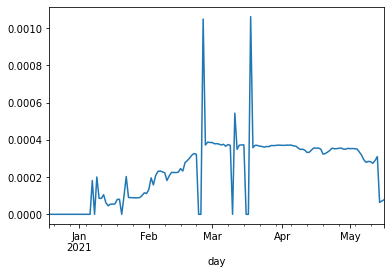

In [ ]:
lido_stat.reward_per_key_stake.plot()


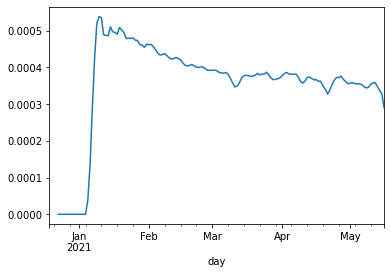

In [ ]:
## Model 2 Calculating keys activated based on the actual reward from https://beaconcha.in/

def open_key(key):
    key = pd.read_csv('C:/temp/Ethereum 2.0 Beacon Chain (Phase 0) Block Chain Explorer - Daily Validator Statistics '+key+' - beaconcha.in - 2021.csv')
    key['income'] = pd.to_numeric([re.findall('(0.\S+) ETH',x)[0] for x in key['Income'].tolist()])
    key['day'] = pd.to_datetime(key['Unnamed: 0'], format='%d %b %Y')
    key['active'] = key['income']>0
    return key[['day','income', 'active']].sort_values(by = 'day').set_index('day')

list_keys = ['52694','57663', '57664', '63138', '52702', '73803', '121049', '121099', '121149', '124949']
dic_keys = {}
for key in list_keys: 
    df_key = open_key(key)
    dic_keys.update({key: df_key['income']})
    dic_keys.update({key+"active": df_key['active']})
df_keys = pd.DataFrame(dic_keys,index = timeline.day)
df_keys =df_keys.fillna(0)

df_keys['day_reward']=0
df_keys['activekeys'] = 0
for key in list_keys: 
    df_keys['day_reward'] += df_keys[key]
    df_keys['activekeys'] += df_keys[key+"active"]
    
df_keys['day_reward']=df_keys['day_reward']/df_keys['activekeys'].where(df_keys['activekeys']>0,1)*0.05
df_keys['day_reward_roll'] = df_keys.day_reward.rolling(3).mean().rolling(3).mean()
df_keys['day_reward_roll'].plot()

**P2p Validator**

In [ ]:
n2['stat']['nonactive'] = n2['stat']['totalkeys'] - n2['stat']['activekeys']
n2['stat']['fee_act']=n2['stat']['fee']/n2['stat']['totalkeys']*n2['stat']['activekeys']
n2['stat']['fee_nonact'] = n2['stat']['fee'] - n2['stat']['fee_act']
n2['stat']['steth_price'] = lido_stat['steth_price']
n2['stat']['day_reward_roll']=df_keys['day_reward_roll']
n2['stat']['day_reward_roll']=n2['stat']['day_reward_roll'].fillna(0)
n2['stat']['reward_per_key'] = n2['stat']['reward'] *n2['stat']['steth_price'] /n2['stat']['activekeys']

In [ ]:
n2['stat']['cashflow'] = n2['stat']['reward'] * n2['stat']['steth_price'] - n2['stat']['fee_act']
n2['stat']['cashflow_cumul'] = n2['stat']['cashflow'].cumsum()

In [ ]:
NOW=dt.datetime(2021,5,16)
n2['stat']['period'] = NOW - n2['stat'].index


In [ ]:
n2['stat'][n2['stat']['addedkeys']>0]

,fee,cnt_fee,addedkeys,keyprice,totalkeys,activekeys,reward,reward_cumul,activekeys_calc,nonactive,fee_act,fee_nonact,steth_price,day_reward_roll,reward_per_key,cashflow,cashflow_cumul,period
key_0,,,,,,,,,,,,,,,,,,
2020-12-19,1.005708,5.0,100.0,0.010057,100.0,100.0,0.000000,0.000000,0.0,0.0,1.005708,0.000000e+00,0.000000,0.000000,0.000000,-1.005708,-1.005708,148 days
2020-12-23,1.941892,3.0,60.0,0.032365,160.0,160.0,0.000000,0.000000,106.0,0.0,1.941892,0.000000e+00,0.000000,0.000000,0.000000,-1.941892,-2.947600,144 days
2020-12-24,0.366723,2.0,40.0,0.009168,200.0,200.0,0.000000,0.000000,73.0,0.0,0.366723,0.000000e+00,0.000000,0.000000,0.000000,-0.366723,-3.314323,143 days
2021-01-11,3.946030,20.0,400.0,0.009865,600.0,600.0,0.017508,0.109532,329.0,0.0,3.946030,4.440892e-16,0.997284,0.000536,0.000029,-3.928570,-7.151246,125 days
2021-01-20,1.886908,20.0,400.0,0.004717,1000.0,1000.0,0.000000,0.376305,476.0,0.0,1.886908,0.000000e+00,1.002625,0.000502,0.000000,-1.886908,-8.773335,116 days
2021-02-15,13.802157,50.0,1000.0,0.013802,2000.0,2000.0,0.251401,3.840292,1668.0,0.0,13.802157,0.000000e+00,0.997531,0.000421,0.000125,-13.551377,-19.120677,90 days
2021-04-21,19.647271,50.0,1000.0,0.019647,3000.0,2522.0,0.572024,40.730063,2085.0,478.0,16.516806,3.130465e+00,0.990733,0.000328,0.000225,-15.950083,0.579634,25 days


In [ ]:
# avg gas_price per serie
gas_price = {'2020-12-19':90.92589803237378,
'2020-12-23':292.99835235816477,
'2020-12-24':83.0000007294901,
'2021-01-11':89.31000555063049,
'2021-01-20':42.705991799999104,
'2021-02-15':124.95198626307906,
'2021-04-21':162.6839888010176}


In [ ]:
m = 1.01111371856722 # calculating error

In [ ]:
# Calculating for each key series

def keys_resume(date1, date0):
        
    gas_price = {'2020-12-19':90.92589803237378,
                 '2020-12-23':292.99835235816477,
                 '2020-12-24':83.0000007294901,
                 '2021-01-11':89.31000555063049,
                 '2021-01-20':42.705991799999104,
                 '2021-02-15':124.95198626307906,
                 '2021-04-21':162.6839888010176}

    keys1 = n2['stat']['reward_per_key'].loc[date1:]*(n2['stat'].loc[date0]['addedkeys']-n2['stat'].loc[date0]['nonactive'])*m 
    keys1 = pd.DataFrame(keys1)
    
    keys1.columns = ['reward']
    keys1['fee'] = -n2['stat'].loc[date0]['fee_act']
    keys1['fee'].loc[1:]=0
    keys1['reward_cumul']=(keys1['reward']+keys1['fee']).cumsum()
    net_income_per_serie = keys1['reward'].sum()-abs(keys1['fee'].sum())
    added_keys =n2['stat'].loc[date0]['addedkeys']
    activity_period = len(keys1)
    keys_fees = abs(keys1['fee'].sum())
    reward_per_serie = keys1['reward'].sum()

    list_resume1 = [date0, added_keys, gas_price[date0], net_income_per_serie, (net_income_per_serie)/activity_period*365*100/keys_fees] 
    if keys1[keys1['reward_cumul']<0]['reward_cumul'].count()<keys1['reward_cumul'].count(): 
        list_resume1.append('yes')
        list_resume1.append(keys1[keys1['reward_cumul']<0]['reward_cumul'].count())
    else: 
        list_resume1.append('no')
        list_resume1.append('-')
    
    list_resume1.append(net_income_per_serie/added_keys)
    list_resume1.append(keys_fees/added_keys)
    list_resume1.append(activity_period)
    list_resume1.append(reward_per_serie)
    
    return list_resume1


In [ ]:
resume_details = pd.DataFrame({'characteristics':['date', 'added keys', 'gas price, Gwei','net income, ETH', 'APR, %', 'paid off','payback period, days','net income per key, ETH', 'key price, ETH', 'activity period, days', 'reward per serie'],
              'serie_1':keys_resume('2020-12-20','2020-12-19'),
              'serie_2':keys_resume('2020-12-24','2020-12-23'),
              'serie_3':keys_resume('2020-12-25','2020-12-24'),
              'serie_4':keys_resume('2021-01-12','2021-01-11'),
              'serie_5':keys_resume('2021-01-21','2021-01-20'),
              'serie_6':keys_resume('2021-02-16','2021-02-15'),
              'serie_7':keys_resume('2021-04-22','2021-04-21')
              })

In [ ]:
resume_details

,characteristics,serie_1,serie_2,serie_3,serie_4,serie_5,serie_6,serie_7
0,date,2020-12-19,2020-12-23,2020-12-24,2021-01-11,2021-01-20,2021-02-15,2021-04-21
1,added keys,100,60,40,400,400,1000,1000
2,"gas price, Gwei",90.9259,292.998,83,89.31,42.706,124.952,162.684
3,"net income, ETH",1.91138,-0.191637,0.800114,7.52524,9.40585,11.0633,-13.0638
4,"APR, %",468.713,-25.014,556.891,556.856,1568.49,325.079,-1154.77
5,paid off,yes,no,yes,yes,yes,yes,no
6,"payback period, days",79,-,71,58,32,49,-
7,"net income per key, ETH",0.0191138,-0.00319394,0.0200028,0.0188131,0.0235146,0.0110633,-0.0130638
8,"key price, ETH",0.0100571,0.0323649,0.00916808,0.00986508,0.00471727,0.0138022,0.0165168
9,"activity period, days",148,144,143,125,116,90,25


In [ ]:
x=0
y=0

for i in range(1,8):
    col_name ='serie_' + str(i)
    x += resume_details.at[10,col_name]*resume_details.at[9,col_name]
    y +=resume_details.at[10,col_name]
    
avg_period = x/y
avg_apr = n2['stat']['cashflow'].sum()/n2['stat']['fee_act'].sum()/avg_period*365*100
avg_payback_period = n2['stat'][n2['stat']['cashflow_cumul']<0]['cashflow_cumul'].count()


In [ ]:
dic_resume = {
    'name':n2['name'],
    'active keys fees, ETH':n2['stat']['fee_act'].sum(),
    'rewards, ETH': n2['stat']['reward'].sum(),
    'net income, ETH': n2['stat']['cashflow'].sum(),
    'nonactive key fees, ETH':n2['stat']['fee_nonact'].sum(),
    'avg APR, %':avg_apr,
    'avg payback period, days':avg_payback_period
}

In [ ]:
resume_overview = pd.DataFrame(pd.Series(dic_resume))
resume_overview.columns = ['characteristics']

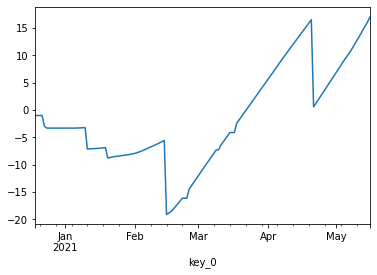

In [ ]:
n2['stat']['cashflow_cumul'].plot()


In [ ]:
resume_overview

,characteristics
name,p2p_validator
"active keys fees, ETH",39.4662
"rewards, ETH",57.2922
"net income, ETH",17.0792
"nonactive key fees, ETH",3.13047
"avg APR, %",151.896
"avg payback period, days",94
